### [ 지도학습-회귀 ]
- 회귀(regresiion) : 수치값을 에측하는 학습
    * ex) 거리, 시간, 무게, 집값 ...  
- 주제 : 공부시간과 과외횟수에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegrssion

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## ===========================================================
## [1-1] 모듈 로딩
## ===========================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## ML 모델 성능시표 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score


## CoW 활성화 : 복사와 공유 자동설정 기능 활성화
pd.options.mode.copy_on_write = True


# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [2]:
## ======================================================
## [1-2] 데이터 준비 및 확인
## ======================================================
hour = [1,2,3,5,7,8,10]
count = [0,0,1,1,2,2,1]
score = [15,32,45,55,60,73,91]

## 공부시간과 과외횟수 , 성적 데이터셋
dataDF = pd.DataFrame({'Hour':hour, 'Count':count , 'Score':score})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Count   7 non-null      int64
 2   Score   7 non-null      int64
dtypes: int64(3)
memory usage: 300.0 bytes


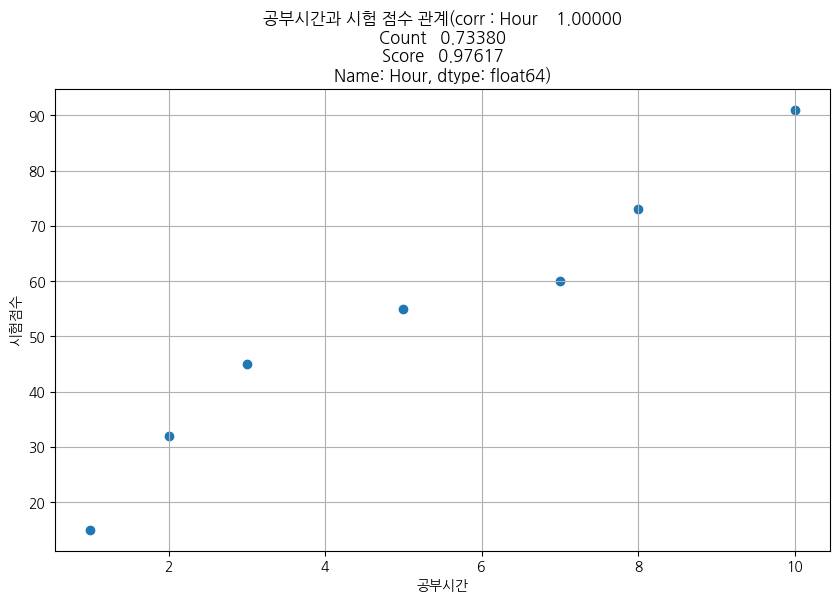

In [3]:
## ====================================================
## 공부시간과 과외 횟수, 성적 관계 시각화 => Linear Model 로써
##                            피쳐와 타겟 선형 관계성
## ====================================================
## => 상관계수 계산 : [기] person -> 피쳐와 타겟의 직선의 선형성
corr = dataDF.corr(numeric_only=True)
corr_value = corr['Hour']


plt.figure(figsize=(10,6))
plt.scatter(dataDF.Hour,dataDF.Score)
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f'공부시간과 시험 점수 관계(corr : {corr_value})')
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리 <hr>

In [4]:
## [2-1] 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[0:-1]]    
targetSR = dataDF[dataDF.columns[-1]]       

print(featureDF.shape, targetSR.shape)

(7, 2) (7,)


In [5]:
## [2-2] 학습용과 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    random_state=10 )  

print(f'[Train] x_train : {x_train.shape}, x_test : {x_test.shape}')     
print(f'[Test] y_train : {y_train.shape}, y_test : {y_test.shape}')     

[Train] x_train : (5, 2), x_test : (2, 2)
[Test] y_train : (5,), y_test : (2,)


[3] 학습 진행 <hr>

In [6]:
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
## 학습진행 => 학습용 데이터셋만 사용 => 시험점수 = 공부시간*w2 + 과외횟수*w1 + w0
lrModel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
##  - 모델 파라미터 : 파라미터이름_ -> 피처에 곱해지는 가중치 w, 결과 미세조정 bias 

print('coef_:',lrModel.coef_)                   ## 가중치
print('intercept_:',lrModel.intercept_)         ## 절편
print('feature_names_in_', lrModel.feature_names_in_)
print('n_features_in_', lrModel.n_features_in_)

print('선형힉 즉, 모델 : ',f'{lrModel.coef_[0]:.3f} * 공부시간 +{lrModel.coef_[1]:.3f} * 과외횟수+ {lrModel.intercept_:.3f}')

coef_: [ 15.833333 -26.      ]
intercept_: 0.1666666666666714
feature_names_in_ ['Hour' 'Count']
n_features_in_ 2
선형힉 즉, 모델 :  15.833 * 공부시간 +-26.000 * 과외횟수+ 0.167


[4] 성능 평가 <hr>

In [9]:
## 훈련용으로 성능 평가 & 테스트용 성능 평가 비교
## => 회귀 모델 score() => r2_score 계산 진행 0~1 => 1에 가까울수록 좋은 성능!
## => 음수값 성능이 나오는 경우 => 쓰레기 모델!! 즉. 타겟과 상관성없는 피쳐들일수 있음
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f'[train_score] {train_score}')
print(f'[test_score] {test_score}')

[train_score] 0.9962156317578004
[test_score] -1.142433312329342


In [10]:
## ================================================
## 다양한 회귀 모델 성능 지표 확인
## ================================================
## => 예측값과 실제값 함수에 전달
pre_score = lrModel.predict(x_test)

## => 성능지표 계산
## => 에러/오차/잔차 : 값이 0에 가까울수록 좋음
print('MAE', mean_absolute_error(y_test,pre_score))
print('MSE', mean_squared_error(y_test,pre_score))
print('RMSE', root_mean_squared_error(y_test,pre_score))

## => 회귀선이 얼마나 데이터를 잘 설명/표현하는가? : 값이 1에 가까울수록 좋음
print('R2', r2_score(y_test,pre_score))                 ## 회귀모델.score()에서 사용하는 계산 값

MAE 32.416666666666664
MSE 1133.347222222222
RMSE 33.66522274131306
R2 -1.142433312329342


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운피쳐) ==> 예측 무게 값
- n_neighbors 무게 추출 => 평균한 값과 예측 무게값이 같은지 확인

In [11]:
newDF = pd.DataFrame([4.3], columns=dataDF.columns[0:1])
newDF

,Hour
0,4.30000


In [12]:
## 서ㅓㄴ형식 값들
lrscore = lrModel.predict(pd.DataFrame([[1],[11]], columns=dataDF.columns[0:1]))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Count


In [ ]:
## 예측값 추출
pre_score = lrModel.predict(newDF)
pre_score

array([44.766129])

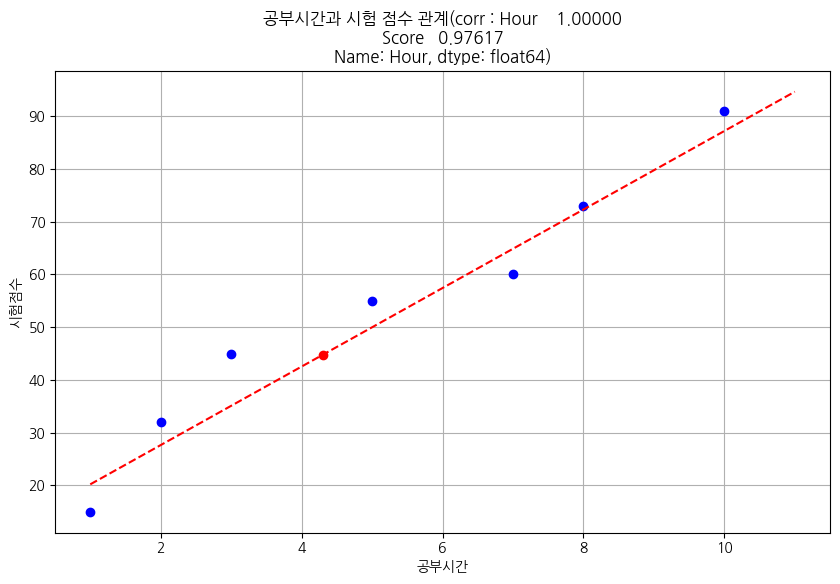

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(dataDF.Hour, dataDF.Score,'bo')
plt.plot(newDF.Hour,pre_score,'ro')

## 선형식 그래프
plt.plot([1,11],lrscore,'r--')

plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f'공부시간과 시험 점수 관계(corr : {corr_value})')
plt.show()


[pre_score] [44.766129]
선형식 즉, 모델 : 44.766129032258064


,Hour
0,1
3,5
4,7
5,8
1,2


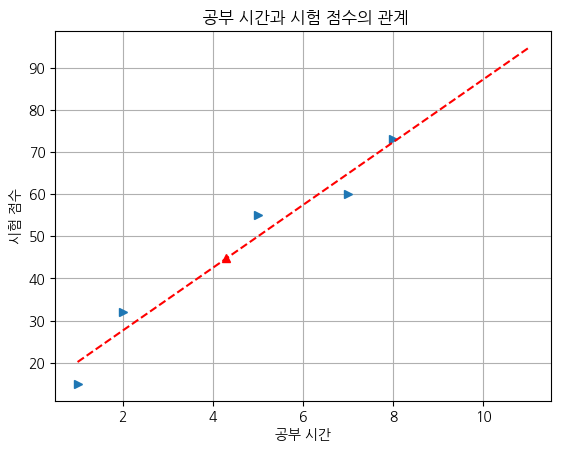

In [ ]:
# 예측값 추출
pre_score = lrModel.predict(newDF)
print("[pre_score]", pre_score)

print(f'선형식 즉, 모델 : {lrModel.coef_[0]*4.3 + lrModel.intercept_}')

## ===> 시각화
## 학습 데이터
## x와 y가 만나 지점을 이어 연결하면 선 그래프
## [기] 선 그래프
## [선] 마크 '마크형태' => 'o', '^', '<', '>'
display(x_train)
plt.plot(x_train.Hour, y_train, '>')        ## 'colormarkerlinestyle'

## 선형식 그래프
plt.plot([1,11], lrscore, 'r--')


## 새로운 데이터
plt.plot(newDF.Hour, pre_score, 'r^')

# => 시각화
plt.title(f" 공부 시간과 시험 점수의 관계")
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.grid()
plt.show()